# Basic Binary Classification

See original post at http://3leafnodes.com/support-vector-machines-classification

## Imports

In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook

## Import and Explore the Data

In [2]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
breast_cancer.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [4]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

In [5]:
# use this to show a non-truncated table
pd.set_option('display.max_columns', None)  
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Train the Model 

In [6]:
# extracting the first 2 features
X = X[:,:2]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

svclf = SVC(kernel="linear", C=1, random_state=0)
svclf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

### Support Vectors 

In [7]:
X.shape

(569, 2)

In [8]:
svclf.support_vectors_[:5]

array([[ 17.99,  10.38],
       [ 11.42,  20.38],
       [ 12.45,  15.7 ],
       [ 13.71,  20.83],
       [ 13.  ,  21.82]])

In [9]:
svclf.support_vectors_.shape

(152, 2)

## Scoring and Metrics

In [10]:
svclf.score(X_train, y_train)

0.88497652582159625

In [11]:
y_pred = svclf.predict(X_test)
mse = metrics.mean_squared_error(y_test,y_pred)
mse

0.097902097902097904

## Visualisation

In [12]:
# adapted from: http://bit.ly/2iv7FFL

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_model(model, x1, x2, title):

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    plt.figure()    
    plot_contours(plt, model, xx, yy, cmap=plt.cm.Vega10, alpha=0.75)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.Vega10, s=15, alpha=0.95, edgecolors='#333333', linewidths=0.3) 
    plt.xlabel(x1)
    plt.ylabel(x2)
    plt.title(title)
    plt.show()    

<IPython.core.display.Javascript object>


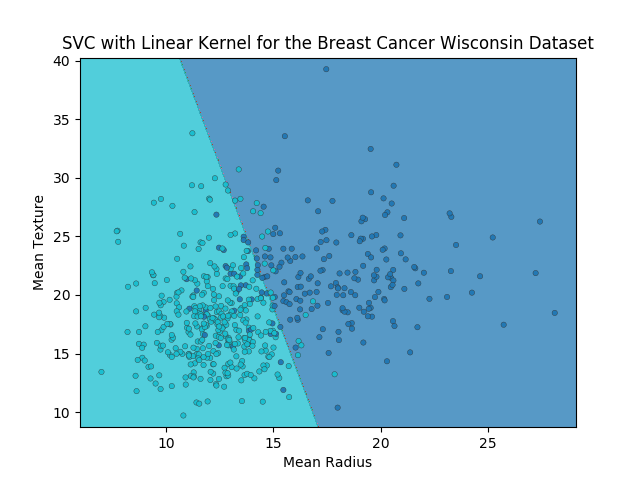

In [13]:
x1 = 'Mean Radius'
x2 = 'Mean Texture'
title = 'SVC with Linear Kernel for the Breast Cancer Wisconsin Dataset'

plot_model(svclf, x1, x2, title)

# Binary Classification with Randomised Grid Search and a Pipeline

## Imports 

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

## Pipeline and Grid Search 

In [15]:
%%time

svclf = SVC(kernel="linear", random_state=0)
X = breast_cancer.data

param_dist = {'selectkbest__k':list(range(1,30)),
              'svc__C':list(range(1,10))}

pipe = make_pipeline(SelectKBest(), StandardScaler(), svclf)
rand = RandomizedSearchCV(pipe, param_dist, cv=10,   
                          scoring='neg_mean_squared_error',
                          n_iter=10, random_state=0)
rand.fit(X, y)

CPU times: user 1.55 s, sys: 37.5 ms, total: 1.59 s
Wall time: 1.81 s


## Performance

In [16]:
print(-rand.best_score_)

0.0281195079086


In [17]:
print(rand.best_params_)

{'svc__C': 1, 'selectkbest__k': 20}


In [18]:
print(rand.best_estimator_)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x10aa8a6a8>)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False))])


# Multi-Class Classification

## Load and Explore the Data

In [19]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

In [20]:
wine.DESCR

'Wine Data Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- 1) Alcohol\n \t\t- 2) Malic acid\n \t\t- 3) Ash\n\t\t- 4) Alcalinity of ash  \n \t\t- 5) Magnesium\n\t\t- 6) Total phenols\n \t\t- 7) Flavanoids\n \t\t- 8) Nonflavanoid phenols\n \t\t- 9) Proanthocyanins\n\t\t- 10)Color intensity\n \t\t- 11)Hue\n \t\t- 12)OD280/OD315 of diluted wines\n \t\t- 13)Proline\n        \t- class:\n                - class_0\n                - class_1\n                - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.1

In [21]:
X.shape

(178, 13)

In [22]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], 
      dtype='<U7')

In [23]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [24]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
from sklearn.svm import LinearSVC
wine_clf = LinearSVC(random_state=0)
wine_clf.fit(X[:, :2], y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

<IPython.core.display.Javascript object>


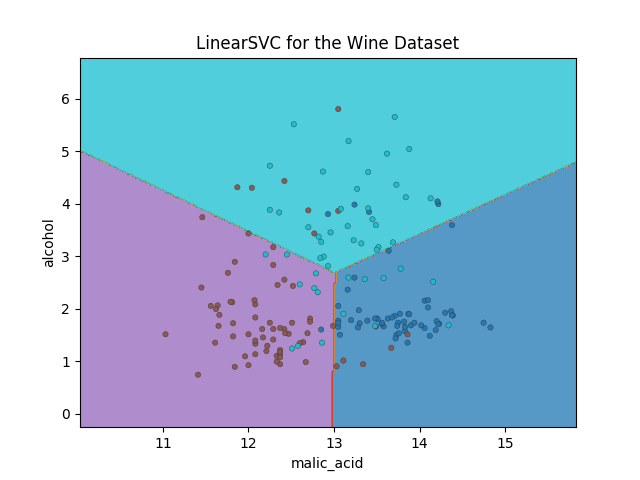

In [26]:
x1 = "malic_acid"
x2 = "alcohol"
title = "LinearSVC for the Wine Dataset"

plot_model(wine_clf, x1, x2, title)

## Train the model

In [27]:
lin_clf = LinearSVC(random_state=0)

param_dist = {'selectkbest__k':list(range(1,13)),
              'linearsvc__C':list(range(1,10))}

pipe = make_pipeline(SelectKBest(), StandardScaler(), lin_clf)
rand = RandomizedSearchCV(pipe, param_dist, cv=10,   
                          scoring='neg_mean_squared_error',
                          n_iter=10, random_state=0)
rand.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x10aa8a6a8>)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'linearsvc__C': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

## Performance

In [28]:
print(-rand.best_score_)

0.0280898876404


In [29]:
print(rand.best_params_)

{'selectkbest__k': 11, 'linearsvc__C': 1}


In [30]:
print(rand.best_estimator_)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=11, score_func=<function f_classif at 0x10aa8a6a8>)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearsvc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0))])
